<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Fundamental Factors](Introduction.ipynb) › Lesson 8: Factor Values vs Factor Ranks
***

# Factor Values vs Factor Ranks

When using a factor in Pipeline, one choice you must make is whether use the raw factor values or whether to rank the values and use the ranks as your factor. Before explaining why you might choose one or the other, let's see how to rank a factor in Pipeline. 

In the following example, we look at the debt-to-equity ratio, which is the ratio of a company's total liabilities to its shareholder equity. The D/E ratio is a measure of a company's finanical leverage, indicating the degree to which a company's operations are funded by debt. Ranking by D/E ratio in Pipeline is a simple matter of using the `rank()` method. However, note the use of `where()` to mask the D/E ratio with our base universe before calling `rank()`. We do this to avoid including securities that aren't part of our universe in the ranks. (Equivalently, we could have passed our universe as the `mask` argument to `rank()`.)

In [1]:
from zipline.pipeline import sharadar, Pipeline
from codeload.fundamental_factors.universe import CommonStocks, BaseUniverse

universe = BaseUniverse()

fundamentals = sharadar.Fundamentals.slice('ART')

de = fundamentals.DE.latest

# Mask d/e with the base universe, before using rank() below 
de = de.where(universe)

pipeline = Pipeline(
    columns={
        'de': de,
        'de_rank': de.rank(),
    },
    initial_universe=CommonStocks(),
    screen=universe
)

Is it better to use factor ranks or factor values? It depends on what you plan to do with your pipeline output. 

There are times when you care about the actual factor values, perhaps because you want to examine their distribution or because you want to bin the values using cutoffs that are meaningful for the specific factor. In those cases, ranking may not be helpful. For example, if you wanted to classify D/E ratios below 1 as "safe", D/E ratios between 1 and 2 as "borderline", and D/E ratios above 2 as "risky", you would need the actual factor values, not the ranks.  

An example where ranking can be helpful is when looking at the long-short, factor-weighted cumulative returns plot in Alphalens. "Factor-weighted" means that the asset weights are proportional to the factor value. This makes the plot sensitive to outliers, as assets with extreme positive or negative values will have extreme positive or negative weights. This situation is exactly what occurred in the previous notebook, causing the factor-weighted cumulative returns plot to show extreme up and down moves. Using factor ranks instead of factor values can mitigate this problem. The outliers will still have larger weights, but much more moderately so, since the weights will be proportional to the ranks (which are linear), rather than to the values on which the ranks are based.

To illustrate the different weighting that can occur from using factor values vs factor ranks, let's create a two-column pipeline that computes weights based on the D/E ratio and the D/E ratio rank: 

In [2]:
pipeline = Pipeline(
    columns={
        'factor_weighted': de / de.sum(),
        'rank_weighted': de.rank() / de.rank().sum()
    },
    initial_universe=CommonStocks(),
    screen=universe
)

If we run this pipeline and plot the maximum weight in each column, we see that weighting on raw factors can result in much more concentrated portfolios than weighting on ranks:

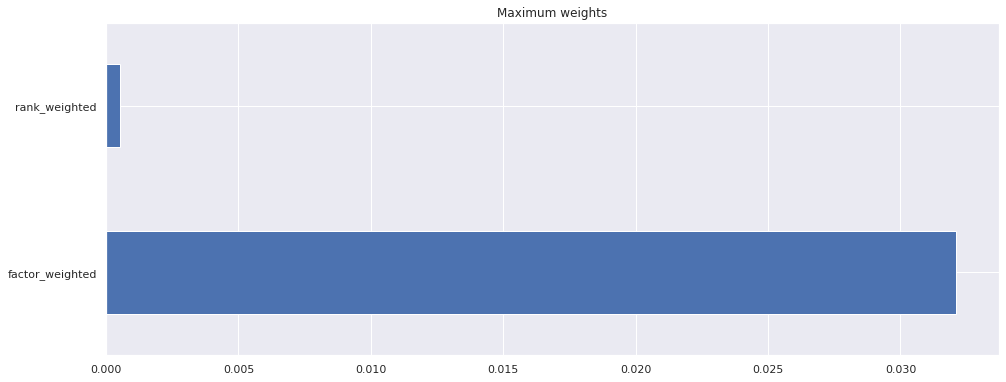

In [3]:
from zipline.research import run_pipeline

results = run_pipeline(pipeline, '2022-12-30', '2022-12-30')

results.max().plot(kind="barh", title="Maximum weights");

## Don't confuse yourself

You can rank values in ascending order (the default) or in descending order (`rank(ascending=False)`). Whichever you choose, it's worth making a mental note of where "good" and "bad" values will end up in the ranked results, as it's easy to get confused. For some metrics, like D/E ratio, small numbers are "good" and large numbers are "bad," while for other metrics, like return on equity, small numbers are "bad" and large numbers are "good." Ranking in ascending order puts the small numbers first (ranks 1, 2, 3, etc.), while ranking in descending order puts the large numbers first. To avoid confusion, you may find it helpful to consistently choose the ranking order that will put the "good" numbers first.

***

## *Next Up*

Lesson 9: [Sector Neutralization](Lesson09-Sector-Neutralization.ipynb)